In [10]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re

In [11]:
#transactions = "../resources/2023_profit_loss_feb_march.xlsx"
budget_map = "../resources/qb_to_budget_map.csv"

In [12]:
#trdf = pd.read_excel(transactions,"Profit and Loss")
bdf = pd.read_csv(budget_map)

In [16]:
bdf.head()

,Category,Subcategory,Item,QB_Item,Budget,Feb,March
0,Salaries,Salaries,Lead Pastor,Lead Pastor,1300.0,1200.00,1500.00
1,Salaries,Salaries,Associate Pastor,Associate Pastor,600.0,600.00,600.00
2,Salaries,Salaries,Childrens,Children's Church Coordinator,0.0,NaN,NaN
3,Facilities,Building/Office,Office Supplies,Office Supplies,42.0,NaN,NaN
4,Facilities,Building/Office,Equipment,Equipment,42.0,1157.37,6.49


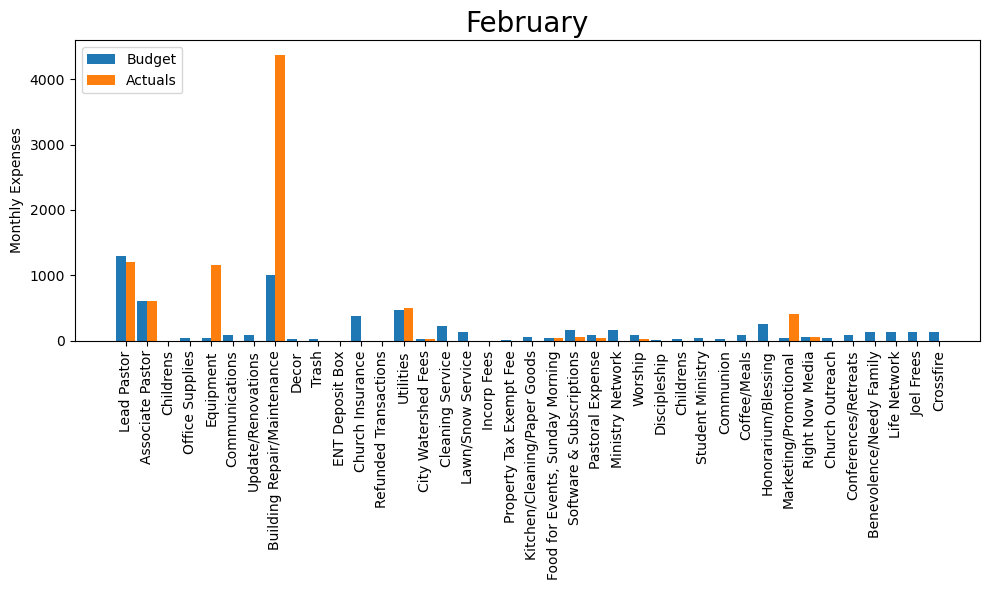

In [42]:
fig, ax = plt.subplots(figsize = (10,6))
ind = np.arange(len(bdf))
width = 0.45
feb = ax.bar(ind, bdf['Budget'], width, label = "Budget")
mar = ax.bar(ind+width, bdf["Feb"], width, label="Actuals")
ax.set_ylabel("Monthly Expenses")
ax.set_title("February", fontsize=20)
ax.legend()

ax.set_xticks(ind+width/2, bdf['Item'], rotation=90)
plt.tight_layout()
plt.savefig("feb_budget_plot.png")

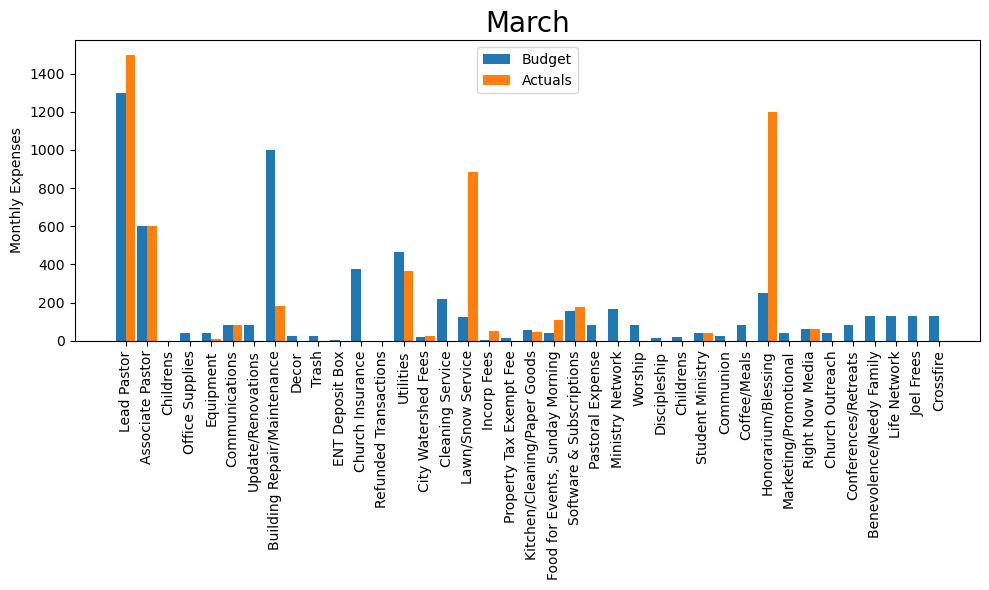

In [43]:
fig, ax = plt.subplots(figsize = (10,6))
ind = np.arange(len(bdf))
width = 0.45
feb = ax.bar(ind, bdf['Budget'], width, label = "Budget")
mar = ax.bar(ind+width, bdf["March"], width, label="Actuals")
ax.set_ylabel("Monthly Expenses")
ax.set_title("March", fontsize=20)
ax.legend()

ax.set_xticks(ind+width/2, bdf['Item'], rotation=90)
plt.tight_layout()
plt.savefig("march_budget_plot.png")

In [33]:
trdf["Amount"] = trdf["Amount"].apply(lambda x: float(x.replace("$","").replace(",","")))

In [36]:
trdf['Split account'].unique()

array(['Software and Subscriptions', 'Lead Pastor', 'Pastoral Expenses',
       'Updates/Renovations', 'General Tithe', 'Associate Pastor',
       'Kitchen/Cleaning/Paper Supplies', 'Incorporation Fees',
       'Worship Expenses', 'Cleaning Service', 'Life Network',
       'Joel Frees', 'ENT Checking (Keystone)', 'Crossfire',
       'Right Now Media', 'Office Supplies', 'Church Insurance',
       'Repair and Maintenance', 'City Watershed Fees', 'Utilities',
       'Communications', 'Interest Earned', 'Equipment',
       'Opening Balance Equity', 'Marketing/Promotional', '--',
       'Lawn/Snow'], dtype=object)

In [39]:
spent = trdf[(trdf['Transaction date'] < '02/01/2023') & (trdf['Transaction date']=="Expense")].groupby("Account").aggregate({"Amount":"sum"})

In [40]:
spent

,Amount
Account,


In [28]:
compare = pd.merge(bdf,spent,how='left', left_on="Item", right_on = "Account")

In [29]:
compare["Amount"] = compare["Amount"].apply(abs)

In [31]:
compare.replace(np.NAN,0)

,Category,Subcategory,Item,QB_Item,Budget,Amount
0,Salaries,Salaries,Lead Pastor,Pastor Housing,1300.00,600.00
1,Salaries,Salaries,Associate Pastor,Associate Pastor,600.00,0.00
2,Salaries,Salaries,Childrens,Children's Church Coordinator,0.00,0.00
3,Facilities,Building/Office,Office Supplies,Office Supplies,42.00,432.78
4,Facilities,Building/Office,Equipment,Equipment,42.00,0.00
5,Facilities,Building/Office,Communications,Communications,81.25,279.69
6,Facilities,Building/Office,Update/Renovations,Updates/Renovations,83.00,0.00
7,Facilities,Building/Office,Building Repair/Maintenance,Repair and Maintenance,1000.00,0.00
8,Facilities,Building/Office,Decor,Decor,25.00,0.00
9,Facilities,Building/Office,Trash,Trash,23.00,0.00


In [22]:
list(trdf["Account"].unique())

['Software and Subscriptions',
 'Pastor Housing Allowance',
 'Pastoral Expenses',
 'Updates/Renovations',
 'General Tithe',
 'Associate Pastor',
 'Kitchen/Cleaning/Paper Supplies',
 'Incorporation Fees',
 'Worship Expenses',
 'Cleaning Service',
 'Life Network',
 'Joel Frees',
 '1002 ENT Checking (Keystone)',
 'Crossfire',
 'Right Now Media',
 'Office Supplies',
 'Church Insurance',
 'Lead Pastor',
 'Repair and Maintenance',
 'City Watershed Fees',
 'Utilities',
 'Communications',
 'Facilities',
 'Interest Earned',
 'Opening Balance Equity',
 'Equipment']